<a href="https://colab.research.google.com/github/davidfrostcruz/advance_analytics/blob/main/assignment_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages


In [156]:
# Import libraries
!pip install pandas-profiling
!pip install ydata-profiling
!pip install geopy
!pip install autoviz
!pip install matplotlib
!pip install -U textblob
!pip install statsmodels
!pip install missingno
!python -m textblob.download_corpora
!pip install missingpy
!pip install scikit-learn
!pip install sklearn
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import os
import sklearn

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

# Accessing Data Files

In [157]:
# # Import files using Google colab
# from google.colab import files
# upload = files.upload()
# df = pd.read_csv('train.csv')
# df.head

In [158]:
# Accessing drive files 
# Setting package for drive
!pip install pyDrive
from google.colab import files
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')
# Setting up directory
directory_path = "/content/drive/MyDrive/analytics/data_1"
os.chdir("/content/drive/MyDrive/analytics/data_1")

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [159]:
# Set path to the directory containing the training dataset
path_copy = "/content/drive/MyDrive/analytics/data_1/train.csv"
df_or = pd.read_csv(path_copy) # Getting the original training data Set
df = df_or.copy() # Keeping an exact copy from the data set

#### Defining functions to use

EDA

In [160]:
# Defining numerical and categorical features 
numerical_features = [
'property_max_guests', 'host_response_rate', 'booking_max_nights', 
'booking_min_nights', 'booking_availability_30', 
'booking_availability_60', 'booking_availability_90',
'booking_availability_365', 'reviews_num', 'reviews_rating', 'reviews_acc', 'reviews_cleanliness',
'reviews_checkin', 'reviews_communication', 'reviews_location',
'reviews_value', 'reviews_per_month', 'target'
]
categorical_features = [
'property_summary', 'property_space',
'property_desc', 'property_neighborhood', 'property_notes',
'property_zipcode', 'property_lat', 'property_lon',
'property_type', 'property_room_type',
'property_bathrooms', 'property_bedrooms', 'property_beds',
'property_bed_type', 'property_amenities', 'property_sqfeet',
'property_last_updated', 'host_id',
'host_location', 'host_about', 'host_response_time',
'host_nr_listings', 'host_nr_listings_total',
'host_verified', 'booking_price_covers', 'booking_cancel_policy',
'extra', 'property_id', 'property_name', 'property_transit', 
'property_access', 'property_interaction', 'property_rules', 
'property_scraped_at', 'host_since', 'reviews_first', 'reviews_last'
]

text_columns = [
    'property_name', 'property_summary', 'property_space',
                'property_desc', 'property_neighborhood', 'property_notes',
                'property_transit', 'property_access', 'property_interaction',
                'property_rules'
]

In [161]:
# Function for obtaining the descriptive statistics about the target feature
def stats_target(df, target):
  target_stats = df[target].describe() # Getting the target's descriptive statistics
  stats_target_df = pd.DataFrame(target_stats) # Getting a dataframe
  return stats_target_df

In [162]:
# Function for obtaining the best distribution of target variable
from scipy import stats

def find_best_distribution(data, feature):
    # Fit different distributions to the data
    distributions = [
        stats.norm,  # Normal distribution
        stats.expon,  # Exponential distribution
        stats.gamma,  # Gamma distribution
        stats.lognorm,  # Lognormal distribution
        stats.beta,  # Beta distribution
        stats.uniform  # Uniform distribution
    ]

    # Compute the AIC for each distribution
    aic_values = []
    for distribution in distributions:
        params = distribution.fit(data[feature])
        log_likelihood = distribution.logpdf(data[feature], *params).sum()
        aic = -2 * log_likelihood + 2 * len(params)
        aic_values.append(aic)

    # Select the distribution with the lowest AIC
    best_distribution = distributions[np.argmin(aic_values)]

    # Return the name of the best fitting distribution
    return best_distribution.name

In [163]:
def univariate_plotting(df, feature):
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot histogram with KDE
    sns.histplot(data=df, x=feature, kde=True, ax=axs[0])
    axs[0].set_xlabel('Measurement')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Histogram with KDE')

    # Plot box plot
    axs[1].boxplot(df[feature], notch=True, sym='o')
    axs[1].set_xlabel('Group')
    axs[1].set_ylabel('Measurement')
    axs[1].set_title('Box Plot')

    # Plot kernel density estimate
    sns.kdeplot(data=df, x=feature, ax=axs[2])
    axs[2].set_xlabel('Measurement')
    axs[2].set_ylabel('Density')
    axs[2].set_title('Kernel Density Plot')

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [164]:
# def plot_distribution(df, numerical_features, categorical_features):
#     # Plot numerical features
#     for feature in numerical_features:
#         # Create a figure with subplots
#         fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#         # Plot histogram with KDE
#         sns.histplot(data=df, x=feature, kde=True, ax=axs[0])
#         axs[0].set_xlabel('Measurement')
#         axs[0].set_ylabel('Frequency')
#         axs[0].set_title('Histogram with KDE')

#         # Plot box plot
#         axs[1].boxplot(df[feature], notch=True, sym='o')
#         axs[1].set_xlabel('Group')
#         axs[1].set_ylabel('Measurement')
#         axs[1].set_title('Box Plot')

#         # Plot kernel density estimate
#         sns.kdeplot(data=df, x=feature, ax=axs[2])
#         axs[2].set_xlabel('Measurement')
#         axs[2].set_ylabel('Density')
#         axs[2].set_title('Kernel Density Plot')

#         # Adjust the layout
#         plt.tight_layout()

#         # Show the plot
#         plt.show()

#     # Plot categorical features
#     for feature in categorical_features:
#         # Create a count plot
#         sns.countplot(data=df, x=feature)
#         plt.xlabel('Categories')
#         plt.ylabel('Count')
#         plt.title('Count Plot')
#         plt.xticks(rotation=90)
#         plt.tight_layout()

#         # Show the plot
#         plt.show()

# # Usage example
# plot_distribution(df, numerical_features, categorical_features)

In [165]:
# Definying a function for correlation identification with heatmap visualization
def correlation_heatmap(df):
    # Getting correlation matrix
    corr_matrix = df.corr()
    # Print correlation matrix
    print("Correlation Matrix:\n", corr_matrix.to_string())
    # Create heatmap plot
    plt.figure(figsize=(10, 8)) # Suggested for plotting the correlation heatmap
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt='.1f')
    # Show the plot
    plt.show()

In [166]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(dataframe):
    # Compute the linkage matrix using Ward's method
    linkage_matrix = linkage(dataframe, method='ward')

    # Plot the dendrogram
    fig, ax = plt.subplots(figsize=(10, 5))
    dendrogram(linkage_matrix)
    plt.xlabel('Locations')
    plt.ylabel('Distance')
    plt.show()

In [167]:
# Getting the accurate types for the data set 
def convert_correct_types(df):
    if df['property_bedrooms'].dtype == 'float64':
        df['property_bedrooms'] = df['property_bedrooms'].fillna(np.NaN).astype('Int64')
    if df['property_beds'].dtype == 'float64':
        df['property_beds'] = df['property_beds'].fillna(np.NaN).astype('Int64')
    if df['booking_price_covers'].dtype == 'float64':
        df['booking_price_covers'] = df['booking_price_covers'].fillna(np.NaN).astype('Int64')
    if df['host_response_rate'].dtype == 'float64':
        df['host_response_rate'] = df['host_response_rate'].fillna(np.NaN).astype('Int64')
    return df 

In [168]:
# Making content of zipcode homogeneous 
def convert_zipcode(df):
    if df['property_zipcode'].dtype == 'object':
        df['property_zipcode'] = df['property_zipcode'].str.strip()
        df['property_zipcode'] = df['property_zipcode'].str.replace(' ', '')
    return df

In [169]:
def duplicate_features(data):
    duplicates = set()  # Empty set
    kept_features = []  # Empty list for kept features
    removed_features = []  # Empty list for removed features

    for i, column1 in enumerate(data.columns):  # Loop over each column
        for j, column2 in enumerate(data.columns[i + 1:], i + 1):  # Loop after column1
            # Checking if column1 and column2 are equal
            if data[column1].equals(data[column2]):
                # If they are equal, add column2 to the duplicates set
                duplicates.add(column2)
                # Get the kept feature, which is the first column of the pair
                kept_feature = data.columns[i]
                kept_features.append(kept_feature)  # List of the kept features
                # Add removed features to a list
                removed_features.append(column2)

                # Print the duplicated feature
                print(f"Feature '{column2}' is duplicated.")

Missigness

In [170]:
# Defining function for recognizing missing values within features
def features_missing_values(df):
    missing = df.isnull().sum() # Identifying missing sum within each feature
    missing_pct = (missing / len(df)) * 100 # Percentage of missingness compare to total n in dataset
    missing_values = pd.concat([
        missing, missing_pct.astype('int64')], # Getting type int64 for Percentage column 
        axis=1, 
        keys=[
            'Total Missing', 'Percentage (%)']
     ) # Creating dataframe with % of missing for each feature
    missing_values.sort_values(by='Total Missing', ascending=False, inplace=True) # Sorting
    missing_values.index.name = 'Feature' # Setting the index as 'Feature'
    return missing_values # It returns an additional dataframe for the missing rate

In [171]:
def identify_missing_features(data, threshold=0.9):
    missing_perc = data.isnull().sum() / len(data) * 100  # Calculate the percentage of missingness within each feature
    high_missing_features = missing_perc[missing_perc >= threshold * 100].index.tolist()  # Features with missing rate >= 90%

    if not high_missing_features:
        print("No features with missingness rate greater than {}% found. The default threshold is 90%.".format(threshold * 100))
    else:
        print("The following features have a missing rate greater than {}%:".format(threshold * 100))
        for feature in high_missing_features:
            print("- {}".format(feature))

In [172]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

def impute_missing_values(df):
    imputed_df = df.copy()

    # Filter the numerical and categorical features based on the remaining columns in the DataFrame
    numerical_features_remaining = [col for col in numerical_features if col in imputed_df.columns]
    categorical_features_remaining = [col for col in categorical_features if col in imputed_df.columns]

    # Initialize the KNN imputer with the number of nearest neighbors
    imputer = KNNImputer(n_neighbors=5)

    # Perform imputation on the numerical features
    imputed_numerical = imputer.fit_transform(imputed_df[numerical_features_remaining])
    imputed_numerical_df = pd.DataFrame(imputed_numerical, columns=numerical_features_remaining)
    imputed_numerical_df[numerical_features_remaining] = imputed_numerical_df[numerical_features_remaining].astype(imputed_df[numerical_features_remaining].dtypes)

    # Concatenate the imputed numerical features with the remaining columns
    imputed_df[numerical_features_remaining] = imputed_numerical_df[numerical_features_remaining]

    # Apply label encoding to the categorical features excluding the text columns
    categorical_features_to_impute = [col for col in categorical_features_remaining if col not in text_columns]
    encoders = {}
    for col in categorical_features_to_impute:
        le = LabelEncoder()
        imputed_df[col] = le.fit_transform(imputed_df[col].astype(str))
        encoders[col] = le

    # Revert label encoding on the categorical features
    for col, le in encoders.items():
        imputed_df[col] = le.inverse_transform(imputed_df[col])

    # Create a new column indicating which rows were imputed
    imputed = (df[numerical_features_remaining] != imputed_numerical_df[numerical_features_remaining]).any(axis=1)
    imputed_df['imputed'] = imputed.astype('int64')

    return imputed_df

outliers

In [173]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor

def encode_categorical_features(df, categorical_features):
    # Perform one-hot encoding on the categorical features
    encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
    onehot = encoder.fit_transform(df[categorical_features])
    onehot_labels = encoder.get_feature_names_out(categorical_features)

    # Create a new DataFrame with the one-hot encoded features
    df_onehot = pd.DataFrame.sparse.from_spmatrix(onehot, columns=onehot_labels)

    return df_onehot

def perform_outlier_detection(df, numerical_features, categorical_features, text_columns):
    # Filter the numerical and categorical features based on the remaining columns in the DataFrame
    numerical_features_remaining = [col for col in numerical_features if col in df.columns]
    categorical_features_remaining = [col for col in categorical_features if col in df.columns]

    # Exclude text columns from outlier detection
    features = numerical_features_remaining + list(df.columns[df.columns.str.startswith('x')])

    # Encode categorical features (excluding text columns)
    encoded_df = encode_categorical_features(df[categorical_features_remaining], categorical_features_remaining)

    # Select the features for outlier detection
    features = [col for col in features if col in encoded_df.columns]

    # Perform outlier detection using Local Outlier Factor (LOF)
    lof = LocalOutlierFactor(n_neighbors=5, contamination=0.01)
    y_pred = lof.fit_predict(pd.concat([encoded_df[features], df[numerical_features_remaining]], axis=1))

    # Create a new column in the original DataFrame to store outlier labels
    df['is_outlier'] = y_pred

    return df

featuring

In [174]:
# Create dummy column for every 'extra' (1 or 0 if property has this extra or not)
def add_and_populate_columns_for_extras(df):
  #step 1: sum up all possible amenities
  extras = [] #empty list
  for index,row in df.iterrows(): #loop over rows
    row_as_list = str(row['extra']).split(sep=', ') #split string seperate amenities (returns list)
    for extra in row_as_list: #loop over seperate amenities in list
      if not extra in extras and extra != 'nan': #for every (new) amenity, check whether it is already in the list, add if not
        extras.append(extra)

  #step 2: create and populate columns in df
  print(extras)
  for extra in extras:
    df['dummy_extra_' + extra] = df.apply(lambda x: extra in str(x['extra']).split(sep=', '), axis=1).astype(int) #loop over unique amenities and check whether string contains this amenity, if so, returns True (dummy=1)

add_and_populate_columns_for_extras(df)

['Host Has Profile Pic', 'Is Location Exact', 'Instant Bookable', 'Host Is Superhost', 'Host Identity Verified', 'Require Guest Phone Verification', 'Require Guest Profile Picture']


In [175]:
from geopy.geocoders import Nominatim
# Getting zipcode from latitude and longitude
geolocator = Nominatim(user_agent="zipcode2", timeout=10)

def add_zipcode2_column(df):
    if "zipcode2" in df.columns:
        print("Column 'zipcode2' already exists. Skipping computation.")
        return df
    else:
        def get_zipcode2(row):
            if pd.notnull(row['property_zipcode']):
                return row['property_zipcode'].replace(" ", "") #delete spaces
            else:
                lat = row['property_lat']
                lon = row['property_lon']
                if pd.notnull(lat) and pd.notnull(lon):
                    location = geolocator.reverse(f"{lat},{lon}", exactly_one=True)
                    address = location.raw['address']
                    return address.get('postcode')
                else:
                    return None
        
        df['zipcode2'] = df.apply(get_zipcode2, axis=1)
        print("Column 'zipcode2' added to DataFrame.")
        return df

model evaluation

In [176]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def score_estimator(estimator, X_test, y_test):
    """Score an estimator on the test set."""
    y_pred = np.round(estimator.predict(X_test))

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print("MSE: %.3f" % mse)
    print("RMSE: %.3f" % rmse)
    print("MAE: %.3f" % mae)

# Exploratory Data Analysis (EDA)

## Descriptive Statistics 

In [177]:

# Getting general information about the dataset 
df.info()
# Reporting descriptive statistics for numerical features within dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   property_id                                   6495 non-null   int64  
 1   property_name                                 6471 non-null   object 
 2   property_summary                              6283 non-null   object 
 3   property_space                                4186 non-null   object 
 4   property_desc                                 6492 non-null   object 
 5   property_neighborhood                         3684 non-null   object 
 6   property_notes                                1973 non-null   object 
 7   property_transit                              3915 non-null   object 
 8   property_access                               3360 non-null   object 
 9   property_interaction                          3091 non-null   o

,property_id,property_lat,property_lon,property_max_guests,property_bathrooms,property_bedrooms,property_beds,property_sqfeet,host_id,host_response_rate,...,reviews_value,reviews_per_month,target,dummy_extra_Host Has Profile Pic,dummy_extra_Is Location Exact,dummy_extra_Instant Bookable,dummy_extra_Host Is Superhost,dummy_extra_Host Identity Verified,dummy_extra_Require Guest Phone Verification,dummy_extra_Require Guest Profile Picture
count,6495.000000,6495.000000,6495.000000,6495.000000,6483.000000,6486.000000,6484.000000,162.000000,6.495000e+03,5034.000000,...,5090.000000,5205.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,3251.799692,50.902186,4.372070,2.999076,1.141293,1.205982,1.742751,520.697531,3.185592e+07,92.061581,...,9.246169,1.667712,67.899923,0.996921,0.754734,0.243726,0.074673,0.531640,0.014781,0.012779
std,1876.169836,0.142571,0.031946,1.778460,0.456293,0.750513,1.339657,615.829250,2.991262e+07,19.462788,...,0.933277,1.992615,51.910478,0.055410,0.430278,0.429362,0.262883,0.499036,0.120683,0.112329
min,1.000000,50.769144,4.268333,1.000000,0.000000,0.000000,1.000000,0.000000,2.582000e+03,0.000000,...,2.000000,0.010000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1628.500000,50.828595,4.347677,2.000000,1.000000,1.000000,1.000000,0.000000,1.005127e+07,95.000000,...,9.000000,0.310000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3252.000000,50.843198,4.367556,2.000000,1.000000,1.000000,1.000000,323.000000,2.393508e+07,100.000000,...,9.000000,0.910000,55.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4876.500000,50.859380,4.395064,4.000000,1.000000,1.000000,2.000000,861.000000,4.317465e+07,100.000000,...,10.000000,2.270000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6500.000000,51.360545,4.483468,16.000000,8.000000,8.000000,16.000000,3229.000000,1.294652e+08,100.000000,...,10.000000,19.900000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Exploring the target feature

In [178]:

# Getting target's descriptive statistics
stats_target(df,'target') 

,target
count,6495.000000
mean,67.899923
std,51.910478
min,10.000000
25%,40.000000
50%,55.000000
75%,80.000000
max,950.000000


In [179]:
# Finding the best distribution
best_fit = find_best_distribution(df, "target")
print("Best fitting distribution:", best_fit)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Best fitting distribution: beta


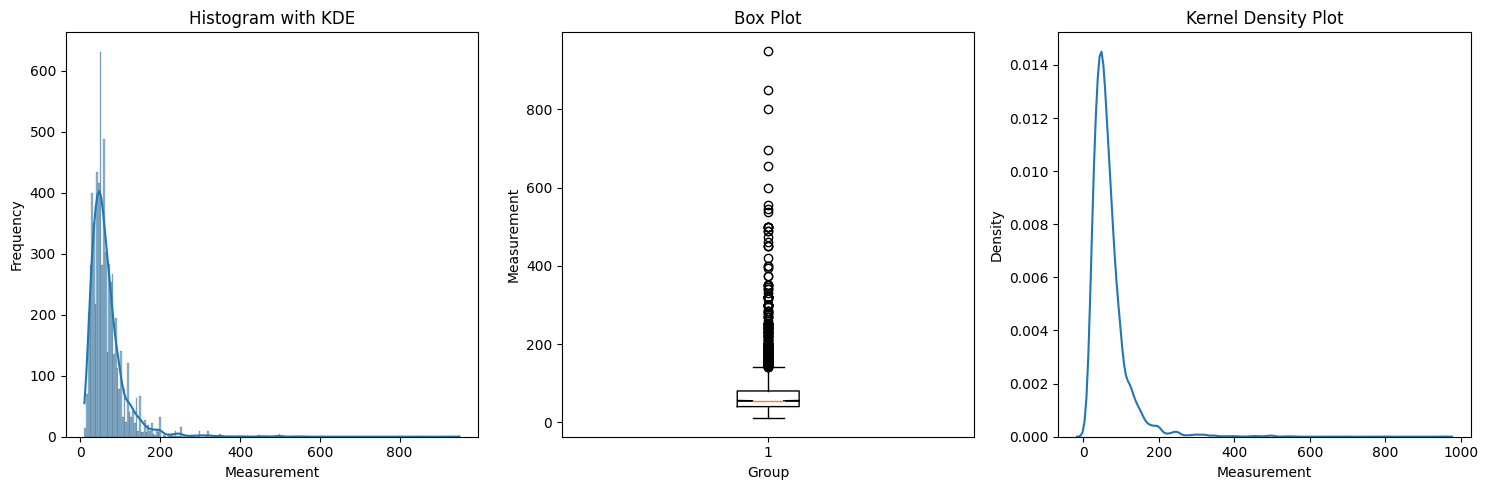

In [180]:
# Univariate analysis
univariate_plotting(df, "target")

### Exploring correlations and associations 

In [ ]:
# Selecting numerical features
numeric_c = df.select(numerical_features + ['target'])
# Numerical correlations 
numeric_corr_target = correlation_heatmap(numeric_c)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-156-1c25c36a1150>", line 2, in <cell line: 2>
    numeric_c = df.select(numerical_features, 'target')
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5902, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'select'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dis

### Exploring outliers


### Exploring missingness

In [181]:
# Renaming missing values 
df = df.replace('', np.NaN)
# Getting the total missing values
print("{} missing values within the dataset.".format(df.isna().sum().sum())) 

48444 missing values within the dataset.


The following object collects the # of missing values within a feature and the rate of missingness within each feature

In [182]:
# Applying function for identifying missing rates on features
features_missing = features_missing_values(df)
print(features_missing)

                                           Total Missing  Percentage (%)
Feature                                                                 
property_sqfeet                                     6333              97
property_notes                                      4522              69
property_interaction                                3404              52
property_rules                                      3169              48
property_access                                     3135              48
...                                                  ...             ...
booking_max_nights                                     0               0
booking_availability_30                                0               0
booking_availability_60                                0               0
booking_availability_90                                0               0
dummy_extra_Require Guest Profile Picture              0               0

[62 rows x 2 columns]


Now, the names of features with a high rate of missigness (>0.5) are going to be collected into a dataframe. They will be used later on when dealing with missignness (you can refer to data cleaning section). 

In [183]:
def features_missing_values(df, threshold=5):
    missing = df.isnull().sum() # Identifying missing sum within each feature
    missing_pct = (missing / len(df)) * 100 # Percentage of missingness compare to total n in dataset
    missing_values = pd.concat([
        missing, missing_pct.astype('int64')], # Getting type int64 for Percentage column 
        axis=1, 
        keys=[
            'Total Missing', 'Percentage (%)']
     ) # Creating dataframe with % of missing for each feature
    missing_values.sort_values(by='Total Missing', ascending=False, inplace=True) # Sorting
    missing_values.index.name = 'Feature' # Setting the index as 'Feature'
    return missing_values[missing_values['Percentage (%)'] > threshold].index.tolist()

In [184]:
features_miss_05 = features_missing_values(df)

In [185]:
features_miss_05

['property_sqfeet',
 'property_notes',
 'property_interaction',
 'property_rules',
 'property_access',
 'host_about',
 'property_neighborhood',
 'property_transit',
 'property_space',
 'host_response_time',
 'host_response_rate',
 'reviews_value',
 'reviews_location',
 'reviews_checkin',
 'reviews_acc',
 'reviews_cleanliness',
 'reviews_communication',
 'reviews_rating',
 'reviews_first',
 'reviews_per_month',
 'reviews_last']

In [186]:
def instances_missing_rate(df):
    # Calculate missing value rate for each instance
    missing_rate_instance = df.isna().sum(axis=1) / df.shape[1]
    # Create dataframe with missing value rate for each instance
    df_missing_rate = pd.DataFrame({'Instance': df.index, 'Missing_Rate': missing_rate_instance})
    return df_missing_rate

In [187]:
df_missing = instances_missing_rate(df)

df_filtered = df_missing[df_missing['Missing_Rate'] > 0.1]

In [188]:
print(df_filtered)

      Instance  Missing_Rate
0            0      0.112903
18          18      0.145161
21          21      0.129032
22          22      0.145161
23          23      0.145161
...        ...           ...
6487      6487      0.209677
6488      6488      0.322581
6491      6491      0.225806
6492      6492      0.258065
6494      6494      0.225806

[3098 rows x 2 columns]


##### Visualization of missingness patterns

<Axes: >

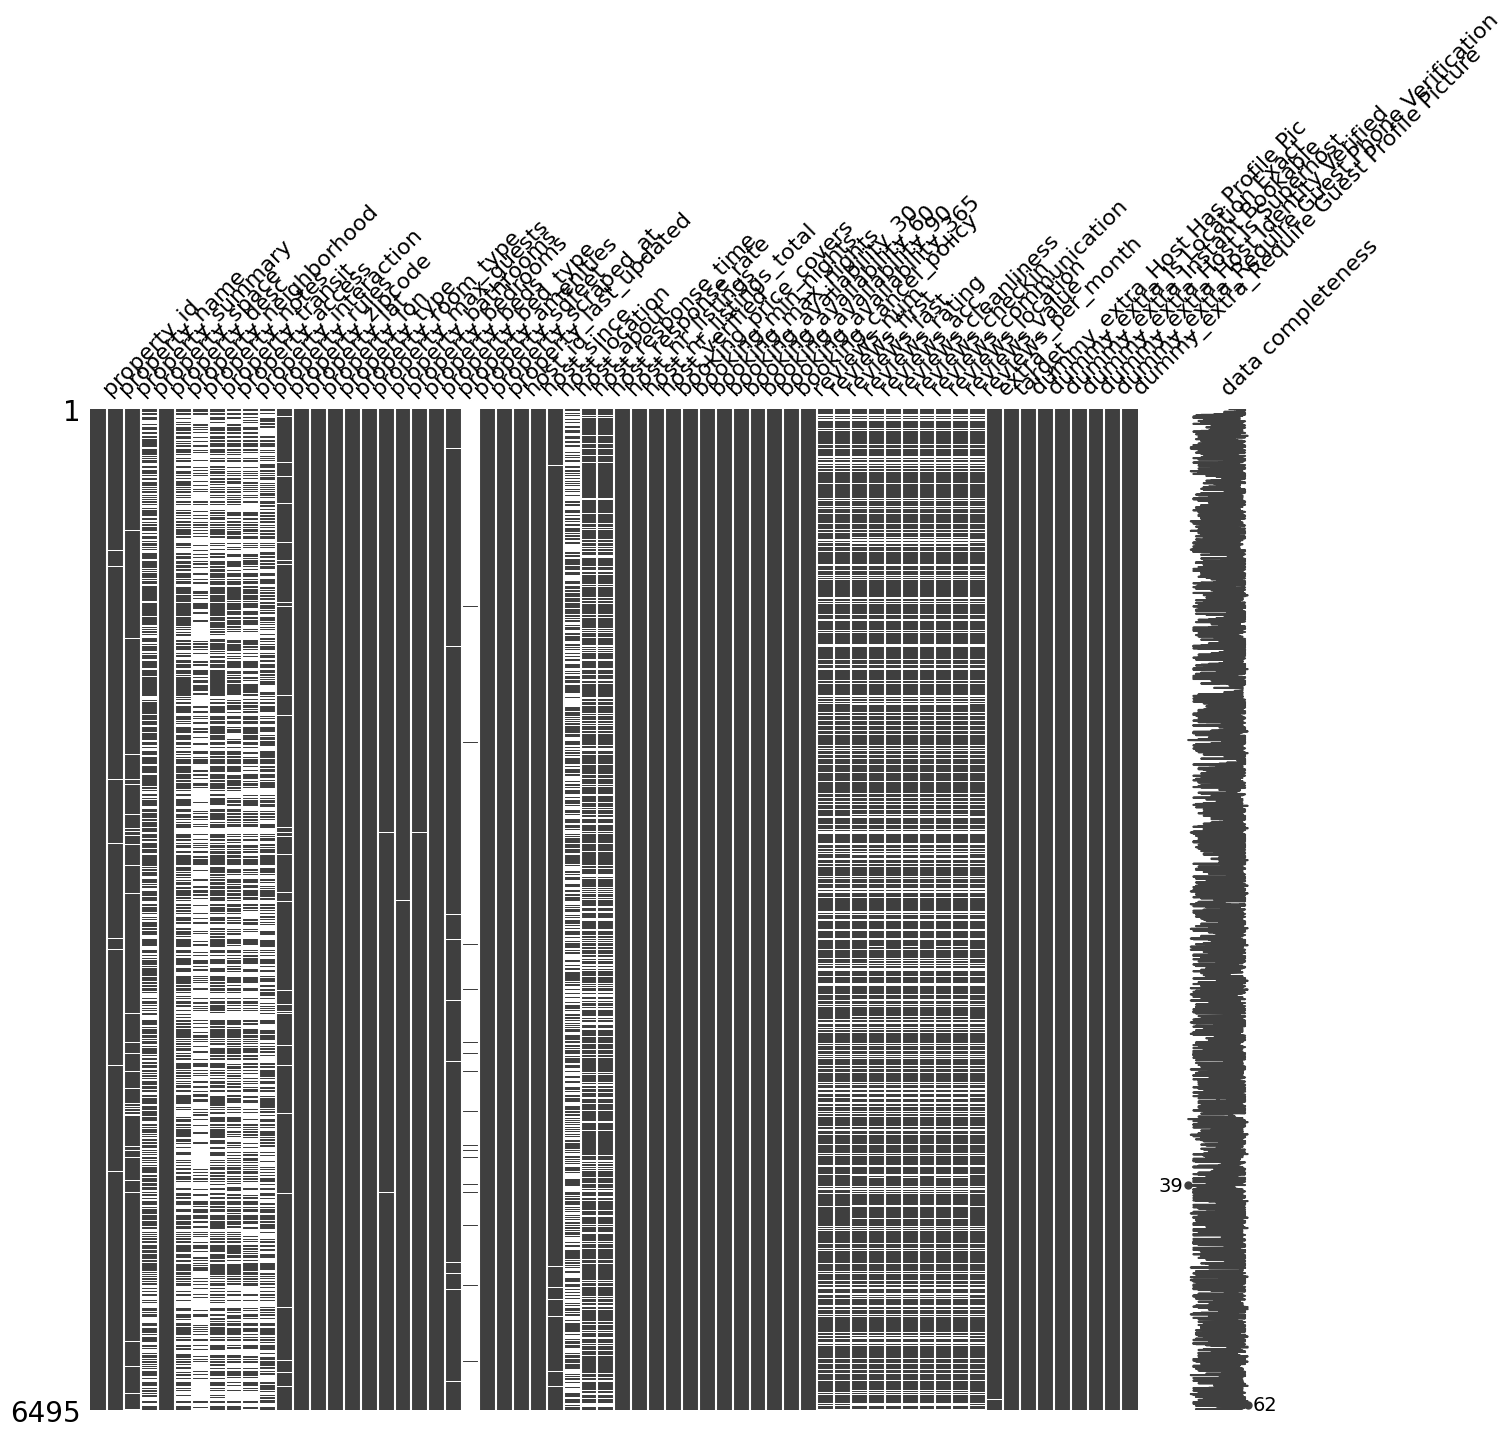

In [148]:
# Missingness matrix
msno.matrix(df, figsize = (15, 13),  labels=True)

<Axes: >

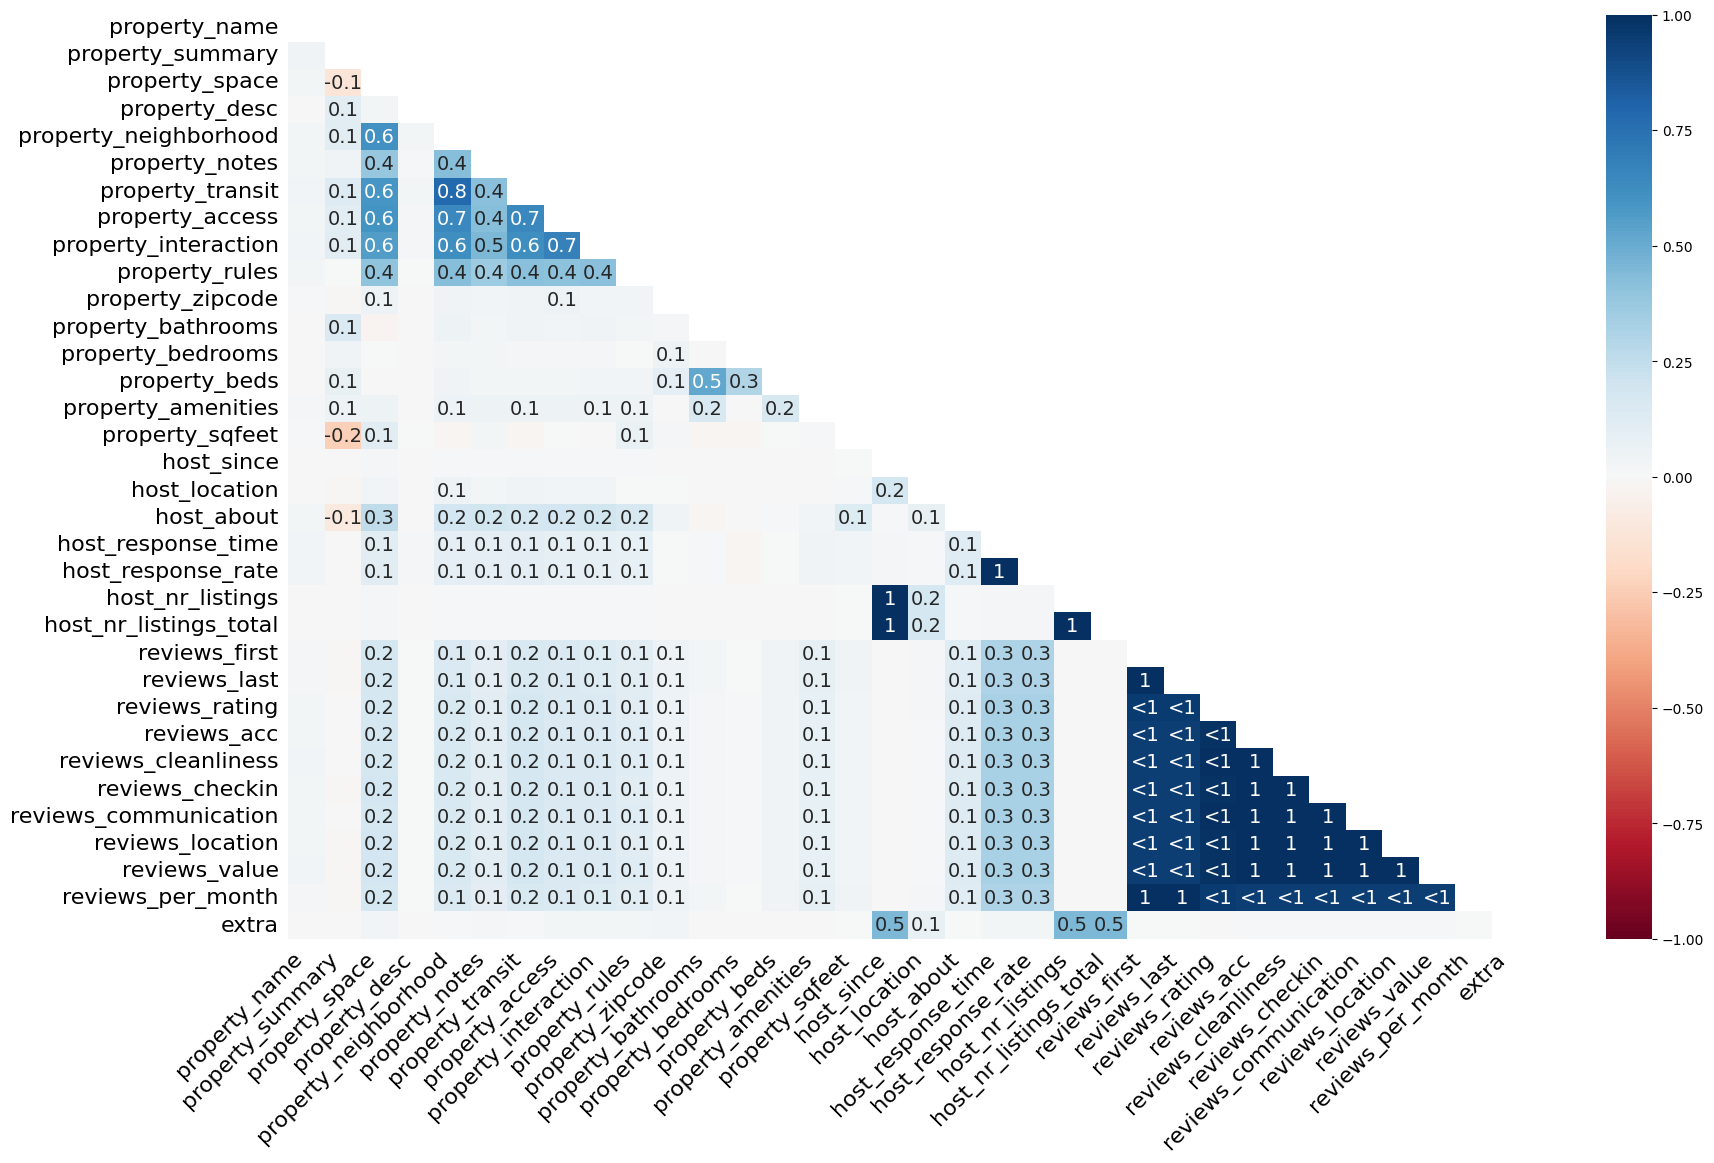

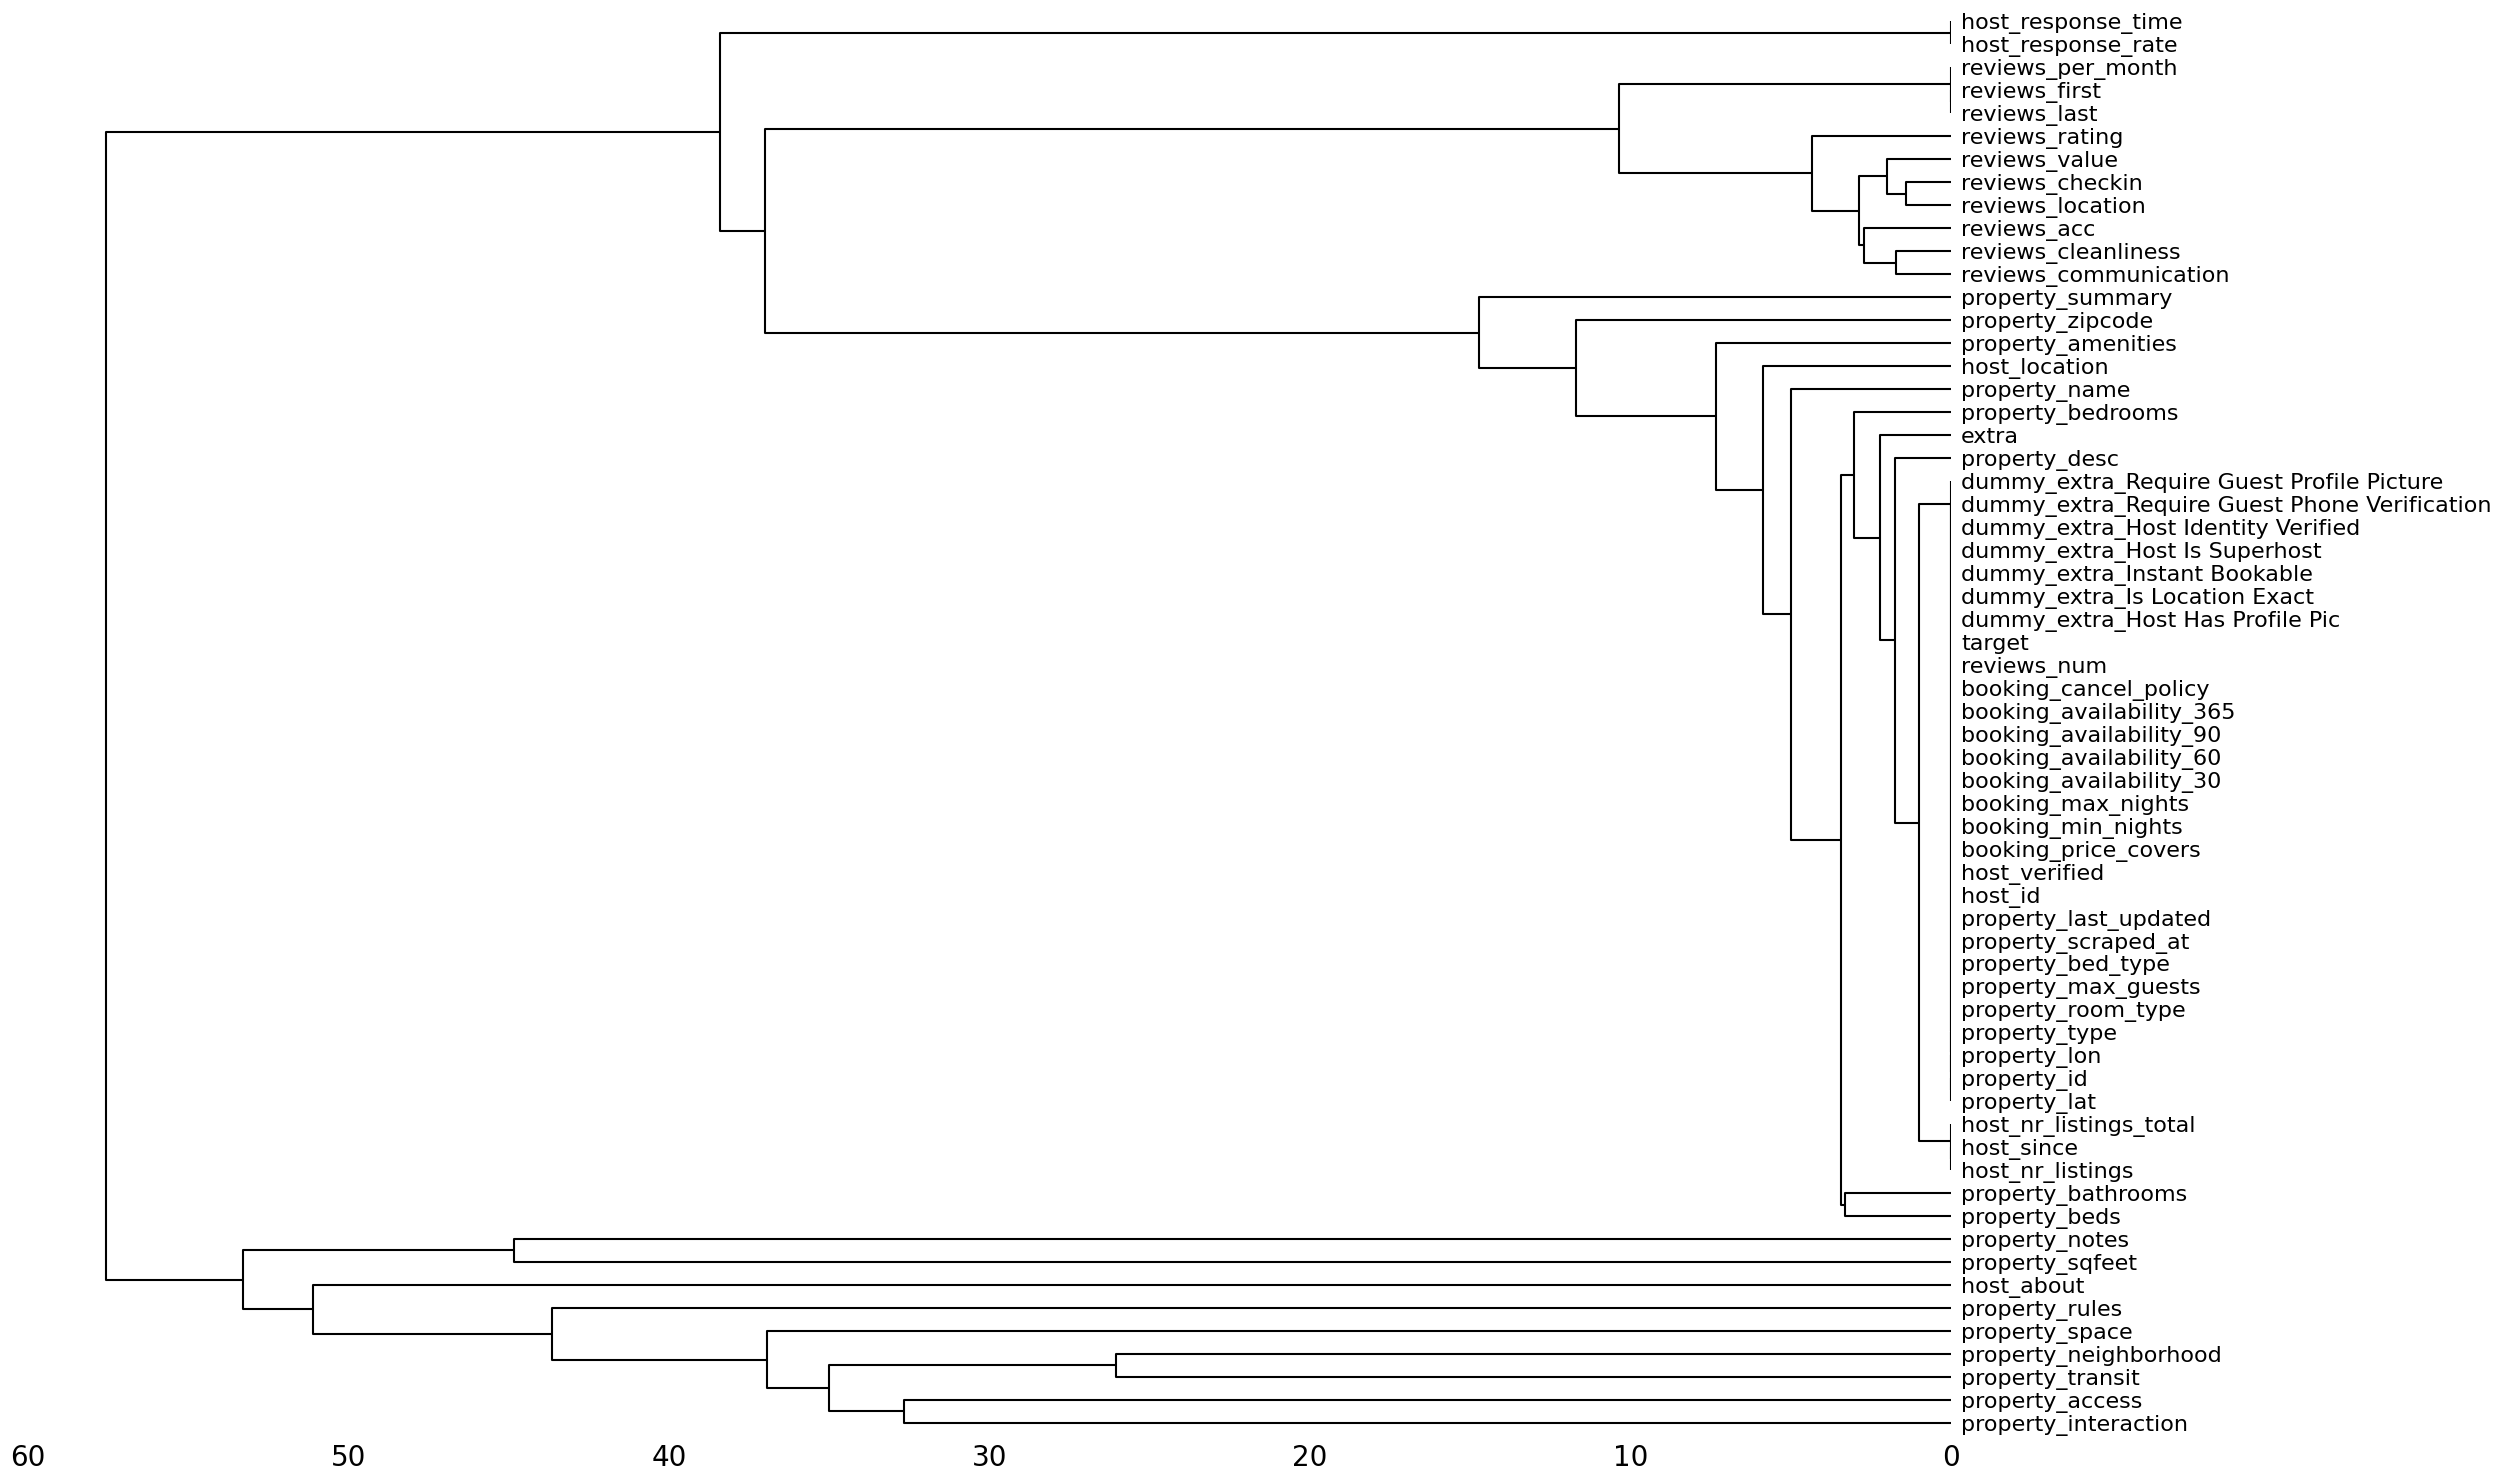

In [149]:
# Missingness nullity correlation
msno.heatmap(df)
# Missingness in dendogram
msno.dendrogram(df)

### Exploring specific features 

Correlation Matrix:
                        reviews_acc  reviews_cleanliness  reviews_checkin  reviews_communication  reviews_location  reviews_value    target
reviews_acc               1.000000             0.585458         0.530873               0.546245          0.421839       0.655144  0.007178
reviews_cleanliness       0.585458             1.000000         0.446029               0.417214          0.362157       0.600849 -0.008724
reviews_checkin           0.530873             0.446029         1.000000               0.710316          0.362900       0.534641 -0.001127
reviews_communication     0.546245             0.417214         0.710316               1.000000          0.385512       0.544665  0.000777
reviews_location          0.421839             0.362157         0.362900               0.385512          1.000000       0.482543  0.022843
reviews_value             0.655144             0.600849         0.534641               0.544665          0.482543       1.000000  0.010774
target

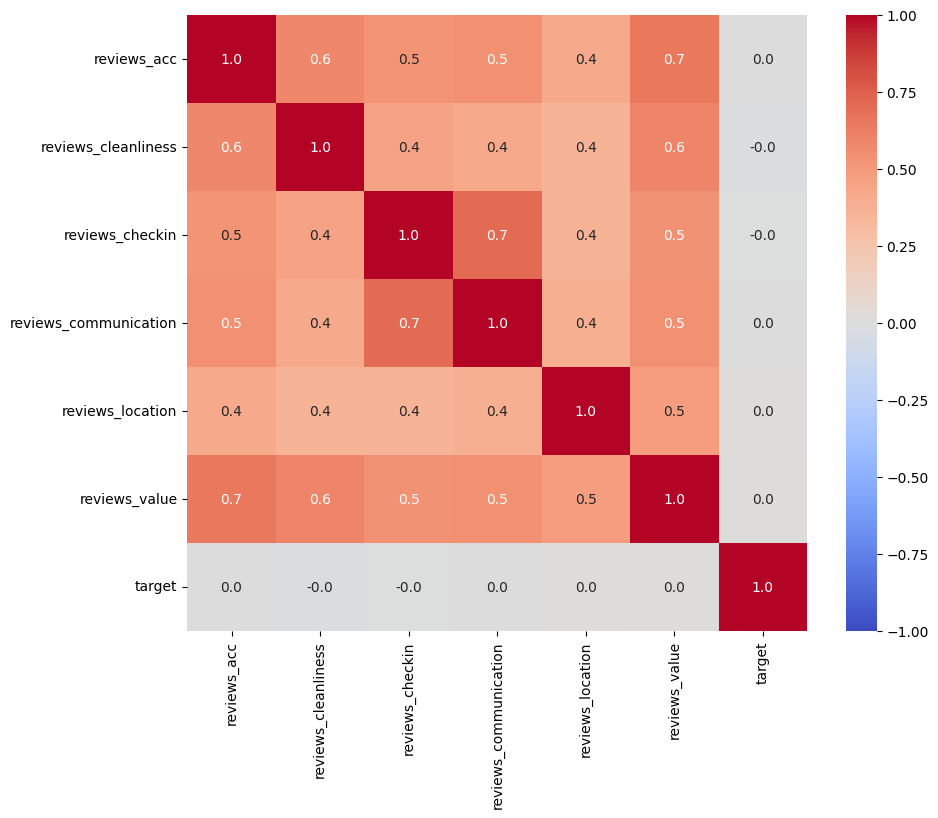

In [150]:
# Reviews features
reviews = df[['reviews_acc', 'reviews_cleanliness', 'reviews_checkin', 'reviews_communication', 'reviews_location', 'reviews_value', 'target']]
# Getting and visualizing correlations with a heatmap and the correlation matrix
correlation_heatmap(reviews)

Correlation Matrix:
                        reviews_acc  reviews_cleanliness  reviews_checkin  reviews_communication  reviews_location  reviews_value    target
reviews_acc               1.000000             0.585458         0.530873               0.546245          0.421839       0.655144  0.007178
reviews_cleanliness       0.585458             1.000000         0.446029               0.417214          0.362157       0.600849 -0.008724
reviews_checkin           0.530873             0.446029         1.000000               0.710316          0.362900       0.534641 -0.001127
reviews_communication     0.546245             0.417214         0.710316               1.000000          0.385512       0.544665  0.000777
reviews_location          0.421839             0.362157         0.362900               0.385512          1.000000       0.482543  0.022843
reviews_value             0.655144             0.600849         0.534641               0.544665          0.482543       1.000000  0.010774
target

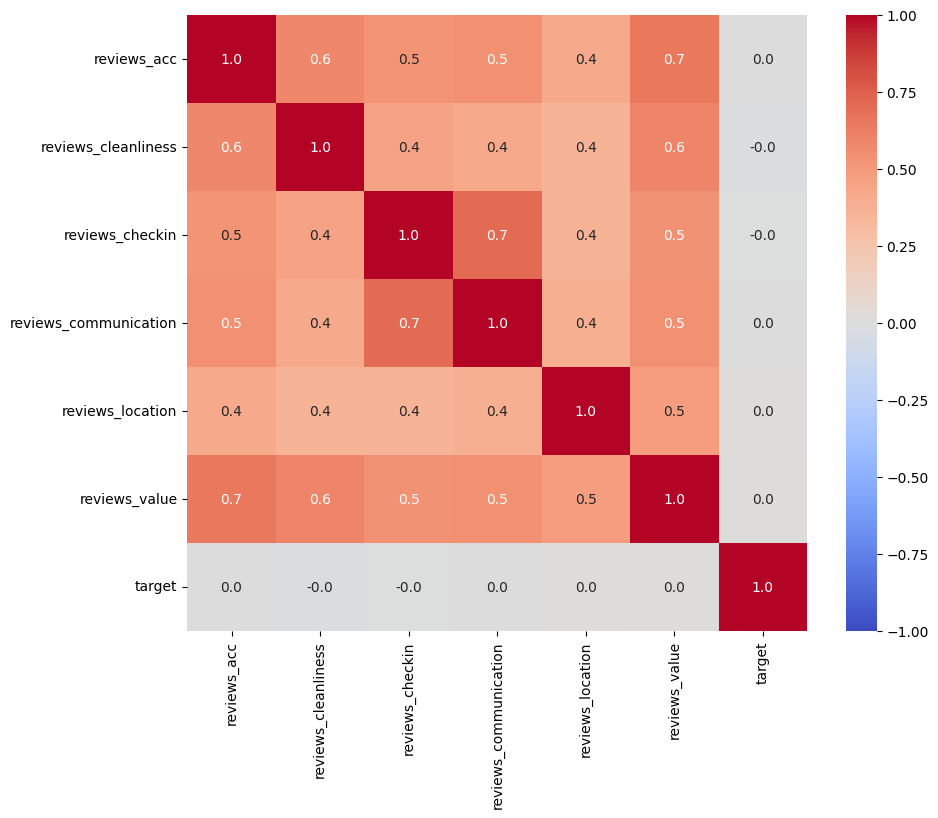

In [151]:
# Reviews features
reviews = df[['reviews_acc', 'reviews_cleanliness', 'reviews_checkin', 'reviews_communication', 'reviews_location', 'reviews_value', 'target']]
# Getting and visualizing correlations with a heatmap and the correlation matrix
correlation_heatmap(reviews)

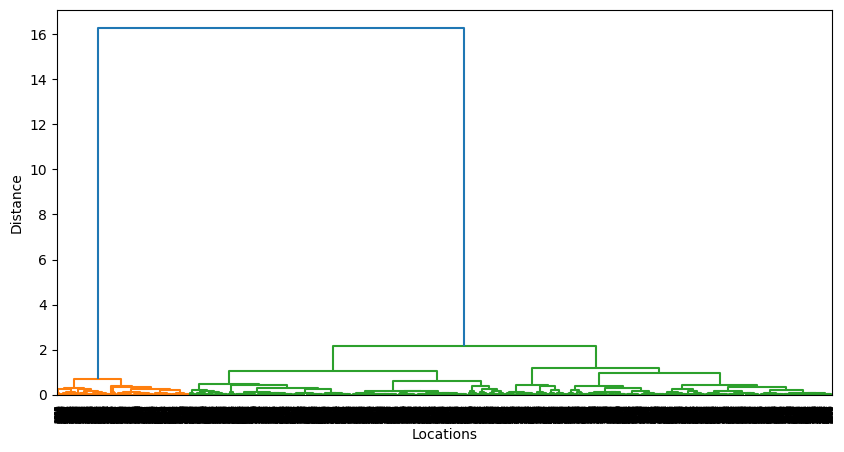

In [152]:
locations = df[['property_lat', 'property_lon']]
plot_dendrogram(locations)

### Using profiling report

In [153]:
# Profile report
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file
profile1 = ProfileReport(
    df, title="Exploratory Data Analysis: airbnb", html={"style": {"full_width": True}}, sort=None
)

In [154]:
# Report using profiling 
profile1.to_notebook_iframe()
profile1.to_file("EDA_tabular_final.html")
# upload HTML file to Google Drive folder
folder_id = 'data_1'
file_name = 'EDA_tabular_final.html'
file_path = '/content/drive/MyDrive/analytics/data_1/EDA_tabular.html'
destination_folder = '/content/drive/MyDrive/analytics/data_1/{}'.format(folder_id)
os.makedirs(destination_folder, exist_ok=True)
!cp "$file_path" "$destination_folder/{file_name}"

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

When using Google Collab, to the get the Exploratory Data Analysis report is necessary to store a html file and then download it. It's because of the size of the file.

# Preprocessing


## Data Cleaning and data consistency


In [ ]:
# Making values from zipcode uniform
df = convert_zipcode(df)

In [ ]:
duplicate_features(df)

In [ ]:
df = df.drop('host_nr_listings_total', axis=1)

## Dealing with missigness

In [ ]:
identify_missing_features(df, threshold=0.9)

In [ ]:
df = df.drop('property_sqfeet', axis=1)

In [ ]:
df_imputed = impute_missing_values(df)

In [ ]:
# Renaming missing values 
df_imputed_na = df_imputed.replace('', np.NaN)
# Getting the total missing values
print("{} missing values within the dataset.".format(df_imputed_na.isna().sum().sum())) 
# Applying function for identifying missing rates on features
features_missing = features_missing_values(df_imputed_na)
print(features_missing)

## Dealing with outliers

In [ ]:
# Perform one-hot encoding and outlier detection
df_out = perform_outlier_detection(df_imputed, numerical_features, categorical_features, text_columns)

In [ ]:
# count the unique values of a feature
unique_counts = df_out['is_outlier'].value_counts()

# print the unique value counts
print(unique_counts)

In [ ]:
removed_rows = df_out[df_out['is_outlier'] == -1].index.tolist()
df_out = df_out[df_out['is_outlier'] != -1]
df_imputed = df_imputed.drop(removed_rows)
# df_imputed = df_imputed[df_imputed['target'] <= 500]
df = df_imputed
print("Removed rows:")
print(removed_rows)

In [ ]:
df = df[df['target'] <= 600]

## Text processing

## Featuring

## Creating features

In [ ]:
# Condition to check for text by row
has_text = df[text_columns].apply(lambda row: 0 if any(pd.isna(row)) or any(row == ' ') or any(row == ' ') else 1, axis=1)

# Assign value to text_var based on the condition
df['text_var'] = has_text

# # # Condition to check for text
# # has_text = df[text_columns].applymap(lambda x: 0 if pd.isna('NaN') else 1)

# # Assign value to text_var based on the condition
# df['text_var'] = has_text.any(axis=1).astype(int)

In [ ]:
df['text_var'].value_counts()

In [ ]:
# encode property_room_type into entire home/apt vs other
def binary_property_room_type(row):
    if row['property_room_type'] == 'Entire home/apt': 
        return 1
    else:
        return 0 
df['property_room_type'] = df.apply(lambda x: binary_property_room_type(x), axis=1)

print(df.property_room_type)

In [ ]:
# Setting an index for reviews: 'reviews_acc', 'reviews_cleanliness', 'reviews_checkin', 'reviews_communication', 'reviews_location', 'reviews_value'
df['reviews_avg'] = df[['reviews_acc', 'reviews_cleanliness', 'reviews_checkin', 'reviews_communication', 'reviews_location', 'reviews_value']].mean(axis=1)
print(df.reviews_avg)

In [ ]:
df = add_zipcode2_column(df)

## Set up

In [ ]:
set_up = df[[
    'reviews_avg', 'booking_max_nights', 'reviews_per_month', 'booking_availability_365', 'property_max_guests',
    'text_var', 'property_beds', 'property_room_type', 'zipcode2', 
     'target', 'dummy_extra_Is Location Exact',
       'dummy_extra_Instant Bookable',
       'dummy_extra_Host Identity Verified',]]

In [ ]:
# Extracting correct features
from sklearn.model_selection import train_test_split
X = set_up.drop('target', axis=1)
Y = set_up['target']

# Splitting data into train data and validation data 


# # Extracting correct features
# from sklearn.model_selection import train_test_split
# X = df_imputed[['property_id', 'property_zipcode', 'property_lat', 'property_lon',
#        'property_type', 'property_room_type', 'property_max_guests',
#        'property_bathrooms', 'property_bedrooms', 'property_beds',
#        'property_bed_type', 'property_amenities',
#        'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
#        'host_location', 'host_response_time', 'host_response_rate',
#        'host_nr_listings', 'host_verified',
#        'booking_price_covers', 'booking_min_nights', 'booking_max_nights',
#        'booking_availability_30', 'booking_availability_60',
#        'booking_availability_90', 'booking_availability_365',
#        'booking_cancel_policy', 'reviews_num',
#        'reviews_rating', 'extra']]
# Y = df_imputed['target']

# # Splitting data into train data and validation data 

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)

# Data Analysis: training the model

## Linear Regression

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import NotFittedError

# Define numeric and categorical features
numeric_features = [
'reviews_avg', 'booking_max_nights', 'reviews_per_month', 
'booking_availability_365', 'property_max_guests',
]
categoric_features = [
'text_var', 'property_beds', 'property_room_type', 'zipcode2', 'dummy_extra_Is Location Exact',
       'dummy_extra_Instant Bookable',
       'dummy_extra_Host Identity Verified',
]
if 'target' in numeric_features:
    numeric_features.remove('target')
# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ])

# Create pipeline with preprocessor and ridge regression

lr = Pipeline(steps=[    ('preprocessor', preprocessor),    ('regressor', LinearRegression())])


# Fit the pipeline on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = np.round(lr.predict(X_test))

## Random Forest Regressor

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import NotFittedError
from sklearn.inspection import permutation_importance

# Define numeric and categorical features
numeric_features = [
'reviews_avg', 'booking_max_nights', 'reviews_per_month', 
'booking_availability_365', 'property_max_guests',
]
categoric_features = [
'text_var', 'property_beds', 'property_room_type', 'zipcode2', 'dummy_extra_Is Location Exact',
       'dummy_extra_Instant Bookable',
       'dummy_extra_Host Identity Verified',
]
if 'target' in numeric_features:
    numeric_features.remove('target')
# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ])


# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ],
    sparse_threshold=0
)

# Create pipeline with preprocessor and random forest regressor
rfr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the pipeline on the training data
rfr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfr = rfr.predict(X_test)

# Fit the OneHotEncoder transformer to the categorical features
categoric_transformer.fit(X_train[categoric_features])

# Get feature importances and names
importances = rfr.named_steps['regressor'].feature_importances_
encoded_cat_features = categoric_transformer.named_steps['onehot'].get_feature_names_out(categoric_features)
all_feature_names = numeric_features + list(encoded_cat_features)
feature_importances = np.zeros(len(all_feature_names))

# Add the importances of the original numeric features
feature_importances[:len(numeric_features)] += importances[:len(numeric_features)]

# Combine the importances of the encoded categorical features into the original features
feature_importances = importances[:len(numeric_features)].tolist()  # Start with the numeric features
for i, feature_name in enumerate(categoric_features):
    encoded_cat_importances = [
        importances[j] for j, feat_name in enumerate(all_feature_names)
        if feat_name.startswith(feature_name + '_')
    ]
    feature_importances.append(sum(encoded_cat_importances))

# Get the names of the original features
original_feature_names = numeric_features + categoric_features

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.barh(original_feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor Feature Importances')
plt.show()

## HistGradientBoostRegressor

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.exceptions import NotFittedError


# Define numeric and categorical features
numeric_features = [
'reviews_avg', 'booking_max_nights', 'reviews_per_month', 
'booking_availability_365', 'property_max_guests',
]
categoric_features = [
'text_var', 'property_beds', 'property_room_type', 'zipcode2', 'dummy_extra_Is Location Exact',
       'dummy_extra_Instant Bookable',
       'dummy_extra_Host Identity Verified',
]
if 'target' in numeric_features:
    numeric_features.remove('target')
# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ])


# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ],
    sparse_threshold=0
)

# Create pipeline with preprocessor and HistGradientBoostingRegressor
hgr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor(max_leaf_nodes=30))
])

# Fit the pipeline on the training data
hgr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hgr = hgr.predict(X_test)

# Get the permutation importances
try:
    result = permutation_importance(hgr, X_test, y_test, n_repeats=10, random_state=42)
except NotFittedError:
    # Handle the case where the model is not fitted
    result = None

if result is not None:
    sorted_idx = result.importances_mean.argsort()

    # Plot the feature importances
    fig, ax = plt.subplots()
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=X_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
else:
    print("Model not fitted.")

## XBoostRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define numeric and categorical features
numeric_features = [
'reviews_avg', 'booking_max_nights', 'reviews_per_month', 
'booking_availability_365', 'property_max_guests',
]
categoric_features = [
'text_var', 'property_beds', 'property_room_type', 'zipcode2', 'dummy_extra_Is Location Exact',
       'dummy_extra_Instant Bookable',
       'dummy_extra_Host Identity Verified',
]
if 'target' in numeric_features:
    numeric_features.remove('target')
# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ])


# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, categoric_features)
    ],
    sparse_threshold=0
)

# Create pipeline with preprocessor and XGBRegressor
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='count:poisson', max_depth=2, n_estimators=1000, learning_rate=0.1, gamma=0.5))
])

# Fit the pipeline on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Get the permutation importances
result = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

# Plot the feature importances
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

# Model Evaluation


In [ ]:
print("lr evaluation:")
score_estimator(lr, X_test, y_test)
print("RFR evaluation:")
score_estimator(rfr, X_test, y_test)
print("HGBR evaluation:")
score_estimator(hgr, X_test, y_test)
print("XGB evaluation:")
score_estimator(xgb, X_test, y_test)

In [ ]:
y_true = set_up['target']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their respective titles
models = [hgr, lr, xgb, rfr]
titles = ["Model 1", "Model 2", "Model 3", "Model 4"]

# Create the subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3)

# Iterate over the subplots and models
for axi, model, title in zip(ax.ravel(), models, titles):
    # Make predictions using the model
    y_pred = model.predict(X_test)
    y_true = y_test.values.ravel()

    # Generate the x-axis values
    x = np.arange(len(y_pred))

    # Plot the predictions and observations as scatter plots
    axi.scatter(x, y_pred, label="Predictions", marker="o")
    axi.scatter(x, y_true, label="Observations", marker="x")

    # Connect the scatter points with lines
    axi.plot(x, y_pred, linestyle="--", color="blue")
    axi.plot(x, y_true, linestyle="--", color="orange")

    axi.set_xlim(0, len(y_pred))
    axi.set_ylim(0, max(max(y_pred), max(y_true)) + 1)
    axi.set(
        xlabel="Sample",
        ylabel="Value",
        title=title  # Add the title to the plot
    )
    axi.legend()

plt.tight_layout()
plt.show()

# from sklearn.utils import gen_even_slices
# def _mean_frequency(y_true, y_pred, sample_weight=None, n_bins=100):
#     """Compare predictions and observations for bins ordered by y_pred.

#     We order the samples by ``y_pred`` and split it in bins.
#     In each bin the observed mean is compared with the predicted mean.

#     Parameters
#     ----------
#     y_true: array-like of shape (n_samples,)
#         Ground truth (correct) target values.
#     y_pred: array-like of shape (n_samples,)
#         Estimated target values.
#     sample_weight : array-like of shape (n_samples,), default=None
#         Sample weights.
#     n_bins: int, default=100
#         Number of bins to use.

#     Returns
#     -------
#     bin_centers: ndarray of shape (n_bins,)
#         bin centers
#     y_true_bin: ndarray of shape (n_bins,)
#         average y_pred for each bin
#     y_pred_bin: ndarray of shape (n_bins,)
#         average y_pred for each bin
#     """
#     if sample_weight is None:
#         weights = np.ones_like(y_true)
#     else:
#         weights = sample_weight

#     idx_sort = np.argsort(y_pred)
#     bin_centers = np.arange(0, 1, 1 / n_bins) + 0.5 / n_bins
#     y_pred_bin = np.zeros(n_bins)
#     y_true_bin = np.zeros(n_bins)

#     for n, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
#         y_pred_bin[n] = np.average(y_pred[idx_sort][sl], weights=weights[sl])
#         y_true_bin[n] = np.average(y_true[idx_sort][sl], weights=weights[sl])
#     return bin_centers, y_true_bin, y_pred_bin


# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# plt.subplots_adjust(wspace=0.3)

# # Define the titles for each plot
# titles = ["Model 1", "Model 2", "Model 3", "Model 4"]

# for axi, model, title in zip(ax.ravel(), [hgr, lr, xgb, rfr], titles):
#     y_pred = model.predict(X_test)
#     y_true = y_test.values.ravel()
#     q, y_true_seg, y_pred_seg = _mean_frequency(
#         y_true, y_pred, n_bins=10
#     )
#     axi.plot(q, y_pred_seg, marker="x", linestyle="--", label="predictions")
#     axi.plot(q, y_true_seg, marker="o", linestyle="--", label="observations")
#     axi.set_xlim(0, 1)
#     axi.set_ylim(0, 20)
#     axi.set(
#         xlabel="Fraction of samples sorted by y_pred",
#         ylabel="Mean Frequency (y_pred)",
#         title=title  # Add the title to the plot
#     )
#     axi.legend()
# plt.tight_layout()

# Model on test data 

In [ ]:
# Set path to the directory containing the training dataset
path_copy_test = "/content/drive/MyDrive/analytics/data_1/test.csv"
df_test_or = pd.read_csv(path_copy) # Getting the original training data Set
df_test = df_test_or.copy() # Keeping an exact copy from the data set